<a href="https://colab.research.google.com/github/Raissa-hue310/Final-Project-Diabete-Prediction/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project– Diabetes Prediction Using Machine Learning
## Student: Raïssa Matho Mekjele
## Course: Data Analytics and Business Intelligence Analyst
## Institution: Willis College


## Step 1: Problem Definition

**Problem statement:**  
The goal of this project is to build an AI model that predicts whether a patient is likely to have diabetes based on basic medical features (e.g., glucose level, BMI, age).

**Why is this important?**  
- Early detection of diabetes can help reduce complications and long-term healthcare costs.  
- Healthcare providers can use such a model as a decision-support tool to prioritize screening and further medical tests.

**Type of problem:**  
- Supervised learning  
- Binary classification (Outcome = 0 → No diabetes, Outcome = 1 → Diabetes)

**Dataset used:**  
- Pima Indians Diabetes Dataset (commonly found on Kaggle/UCI/GitHub)  
- Each row = one patient  
- Target variable = `Outcome` (0 or 1)

In [1]:
!pip install shap lime fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 46.7 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=be98e89abf84c673008e7ea576364b13b2b51c72aeb35b80ae290620c98a8670
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


# Import Libraries

In [2]:
# Step 0: Import required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay
)

import shap
from lime.lime_tabular import LimeTabularExplainer

from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate


# Load dataset

In [3]:
# Step 2: Load the dataset

# If file is in the same folder as the notebook:
data = pd.read_csv("diabetes.csv")

print("Shape of dataset:", data.shape)
data.head()


Shape of dataset: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Basic exploration

In [4]:
# Basic info about the data
data.info()

# Summary statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Basic exploration

In [5]:
# Basic info about the data
data.info()

# Summary statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Check class balance

In [6]:
# Check target distribution
data['Outcome'].value_counts(normalize=True) * 100


,proportion
Outcome,
0,65.104167
1,34.895833


# Handle missing-like values (zeros in some medical fields)
In this dataset, some columns can have 0 where medically it doesn’t make sense (e.g., Glucose = 0).
We’ll treat those zeros as missing and impute with median.


In [7]:
# Columns where 0 means 'missing' rather than real value
cols_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero_as_missing:
    data[col] = data[col].replace(0, np.nan)

# Check missing values
data.isna().sum()


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Impute missing values

In [8]:
# Median imputation
for col in cols_with_zero_as_missing:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

# Verify again
data.isna().sum()


/tmp/ipython-input-3670686608.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Visualizations (EDA)

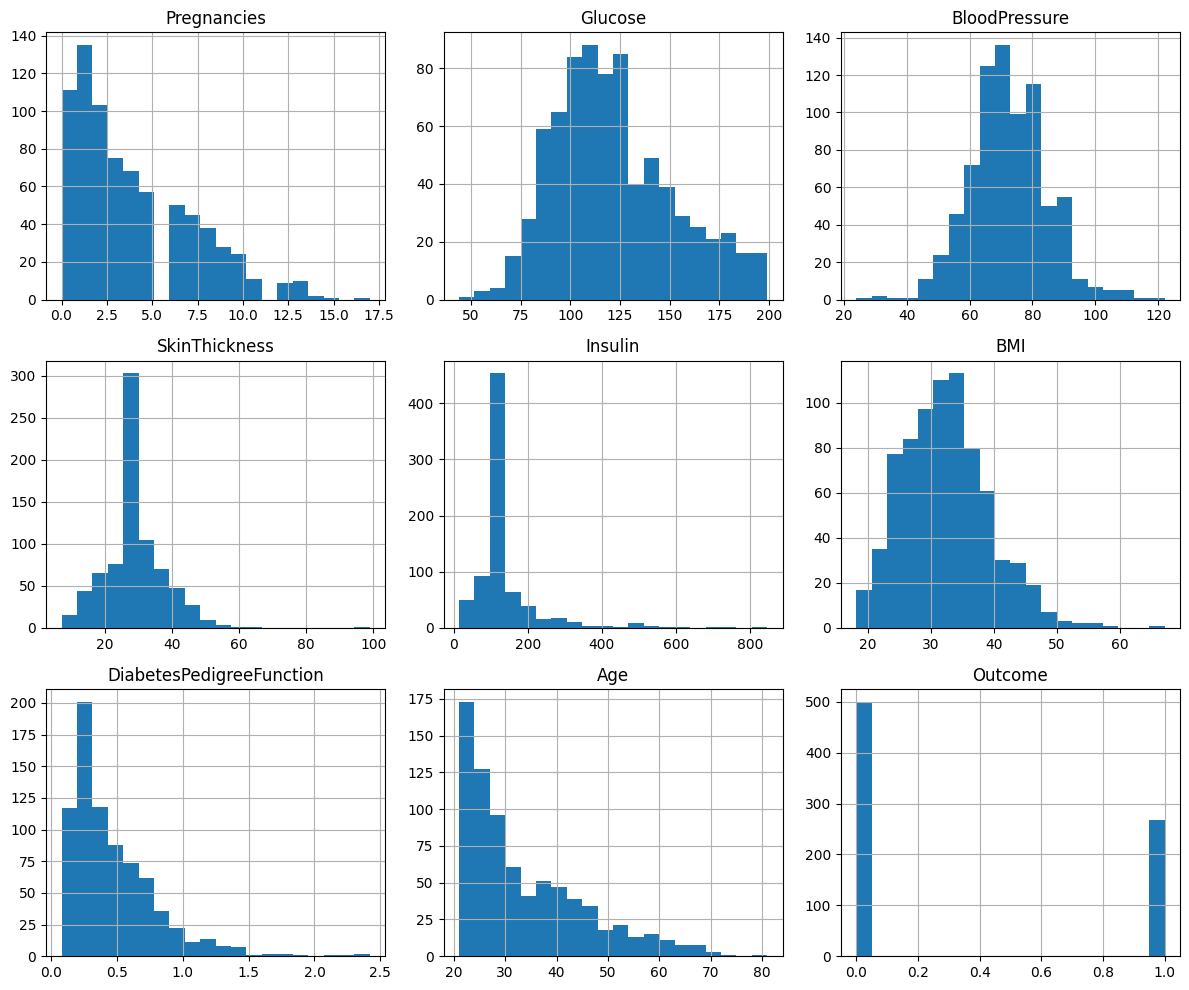

In [9]:
# Histograms for numeric features
data.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()


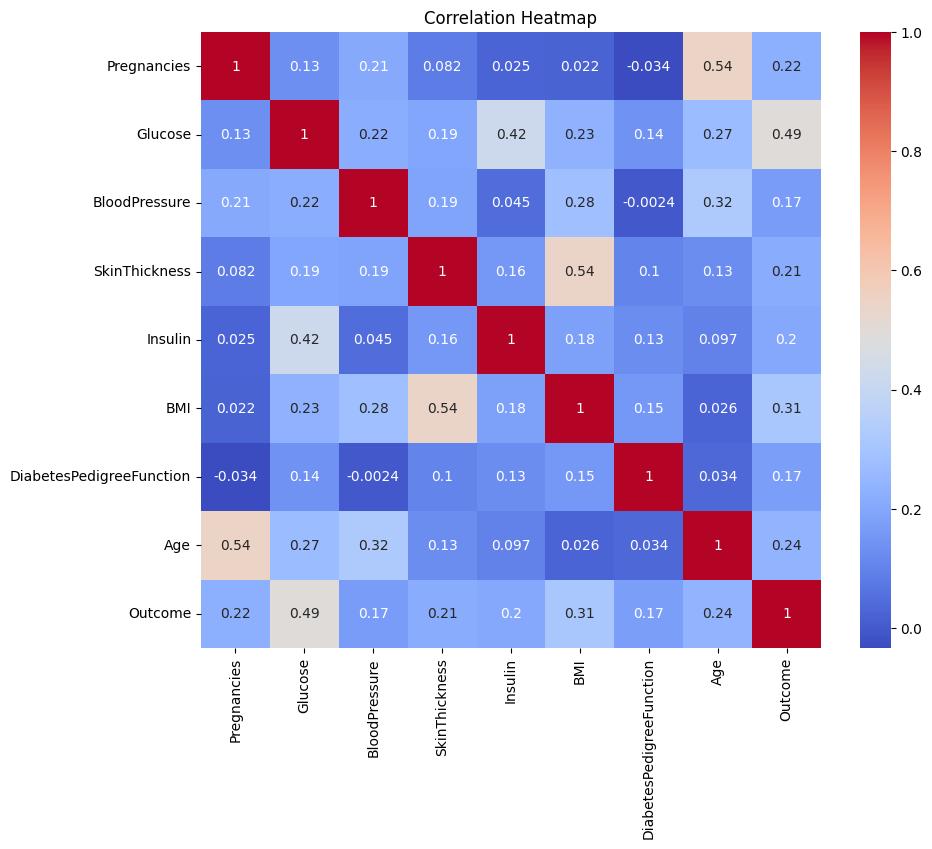

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


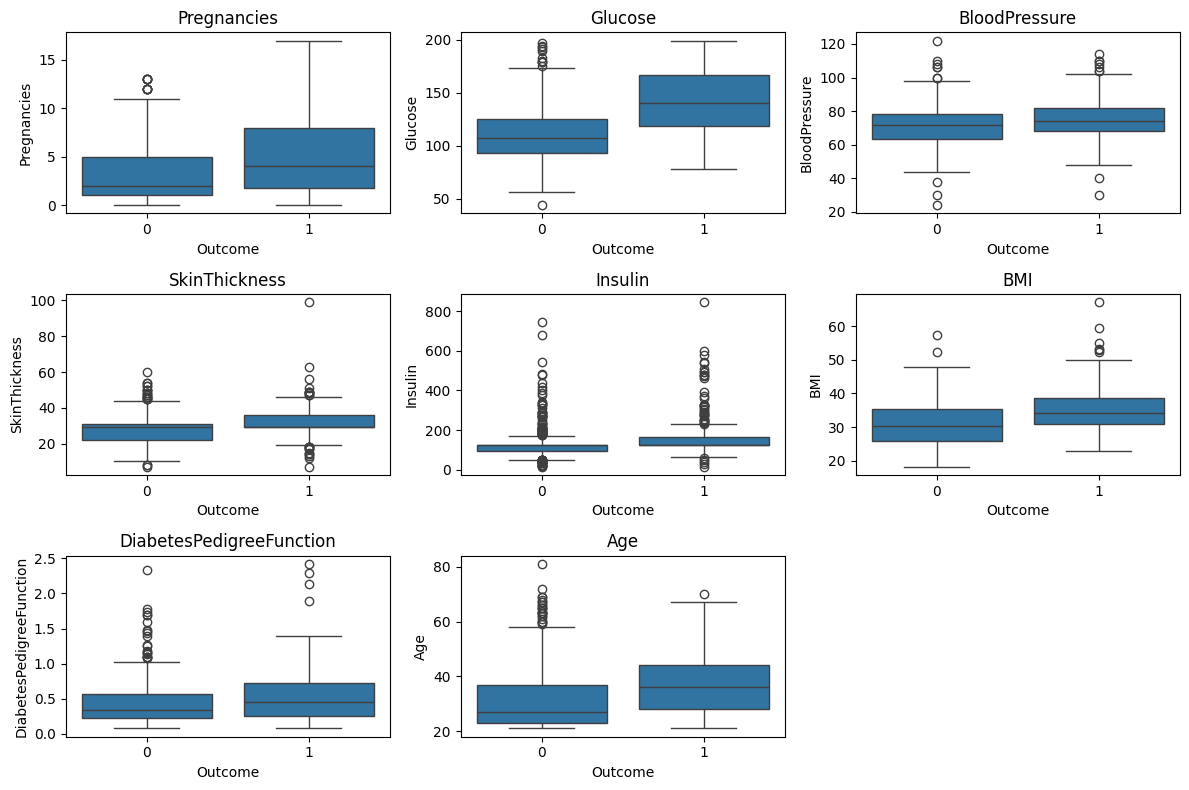

In [11]:
# Boxplots of features by outcome
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns[:-1]):  # exclude Outcome
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=data, x='Outcome', y=col)
    plt.title(col)
plt.tight_layout()
plt.show()


# Train/test split


In [12]:
# Step 2: Split data into features (X) and target (y)

X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Train-test split (stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (614, 8)
Test shape: (154, 8)


# Feature scaling
We’ll use StandardScaler for models like Logistic Regression.

In [13]:
# Step 3: Feature scaling

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Baseline model (Logistic Regression)

In [14]:
# Step 3: Model selection and training (Baseline Logistic Regression)

log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train_scaled, y_train)

y_pred_baseline = log_reg.predict(X_test_scaled)
y_proba_baseline = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Baseline Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("Precision:", precision_score(y_test, y_pred_baseline))
print("Recall:", recall_score(y_test, y_pred_baseline))
print("F1-score:", f1_score(y_test, y_pred_baseline))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_baseline))


Baseline Logistic Regression Results:
Accuracy: 0.7077922077922078
Precision: 0.6
Recall: 0.5
F1-score: 0.5454545454545454
ROC-AUC: 0.812962962962963


# Confusion matrix and classification report

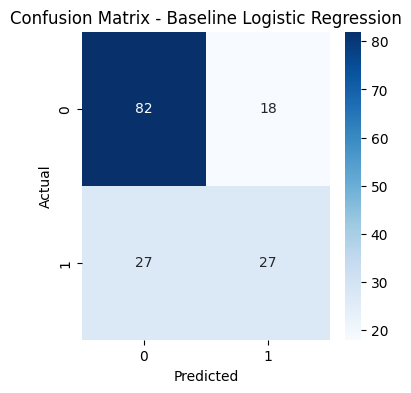

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [15]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_baseline)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Baseline Logistic Regression")
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_baseline))


# ROC Curve

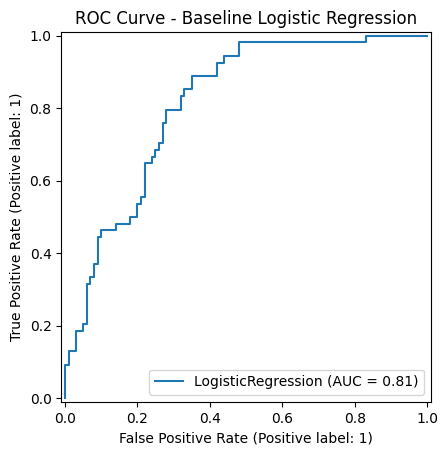

In [16]:
RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.title("ROC Curve - Baseline Logistic Regression")
plt.show()


# Hyperparameter tuning (GridSearchCV)

We’ll tune C (regularization strength) and penalty.

In [17]:
# Step 4: Model optimization with GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # l1 needs solver='liblinear', we keep it simple
    'solver': ['lbfgs']
}

grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV ROC-AUC:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

print("\nTuned Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV ROC-AUC: 0.8432295127353268

Tuned Model Results:
Accuracy: 0.7077922077922078
Precision: 0.6
Recall: 0.5
F1-score: 0.5454545454545454
ROC-AUC: 0.812962962962963


# Fairness analysis with Fairlearn (Age groups)

We’ll see if performance differs for different age groups.

In [18]:
# Step 5: Fairness analysis

# Create age groups
age_bins = [20, 30, 40, 50, 60, 80]
age_labels = ["20-29", "30-39", "40-49", "50-59", "60+"]

data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Recreate X, y including AgeGroup for indexing
X_full = data.drop('Outcome', axis=1)
y_full = data['Outcome']

# Make sure index alignment with X_train/X_test is kept
# Already done earlier with train_test_split; we use AgeGroup from original data:
age_group_test = data.loc[X_test.index, 'AgeGroup']

# Define metrics by group
metrics = {
    'accuracy': accuracy_score,
    'selection_rate': selection_rate,
    'false_positive_rate': false_positive_rate
}

metric_frame = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=age_group_test
)

print("Overall metrics:")
print(metric_frame.overall)

print("\nMetrics by Age Group:")
print(metric_frame.by_group)


Overall metrics:
accuracy               0.707792
selection_rate         0.292208
false_positive_rate    0.180000
dtype: float64

Metrics by Age Group:
          accuracy  selection_rate  false_positive_rate
AgeGroup                                               
20-29     0.776471        0.152941             0.115942
30-39     0.633333        0.433333             0.200000
40-49     0.666667        0.500000             0.333333
50-59     0.444444        0.444444             0.500000
60+       0.666667        0.500000             0.400000


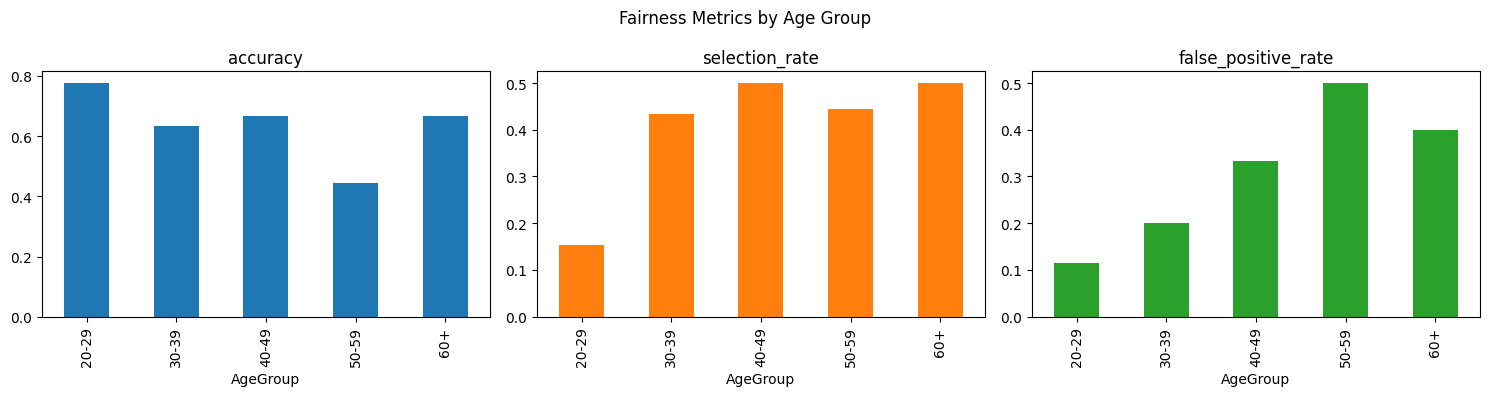

In [19]:
metric_frame.by_group.plot(kind='bar', subplots=True, layout=(1, 3), figsize=(15, 4), legend=False)
plt.suptitle("Fairness Metrics by Age Group")
plt.tight_layout()
plt.show()


# SHAP global explainability

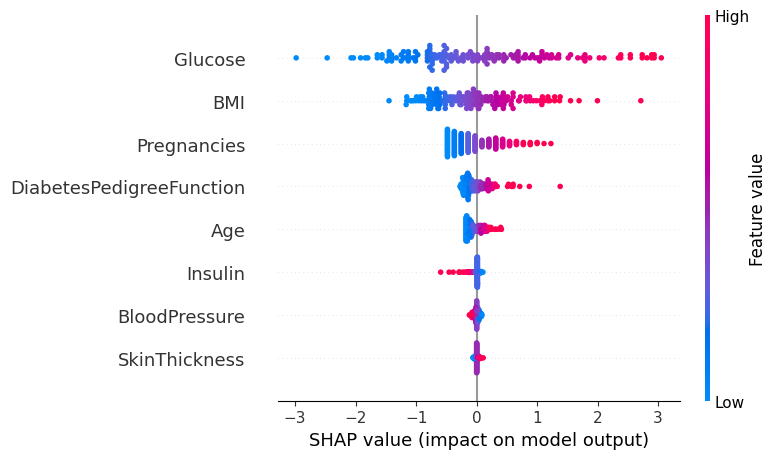

In [20]:
# Step 6: Explainability - SHAP (Global)

# Use a subset for speed
X_train_sample = X_train_scaled
X_test_sample = X_test_scaled

# Create SHAP explainer for linear model
explainer = shap.LinearExplainer(best_model, X_train_sample)

shap_values = explainer.shap_values(X_test_sample)

# Convert to pandas for nicer labels
X_test_df = pd.DataFrame(X_test_sample, columns=X.columns)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test_df, feature_names=X.columns)


# SHAP local explanation (one example)

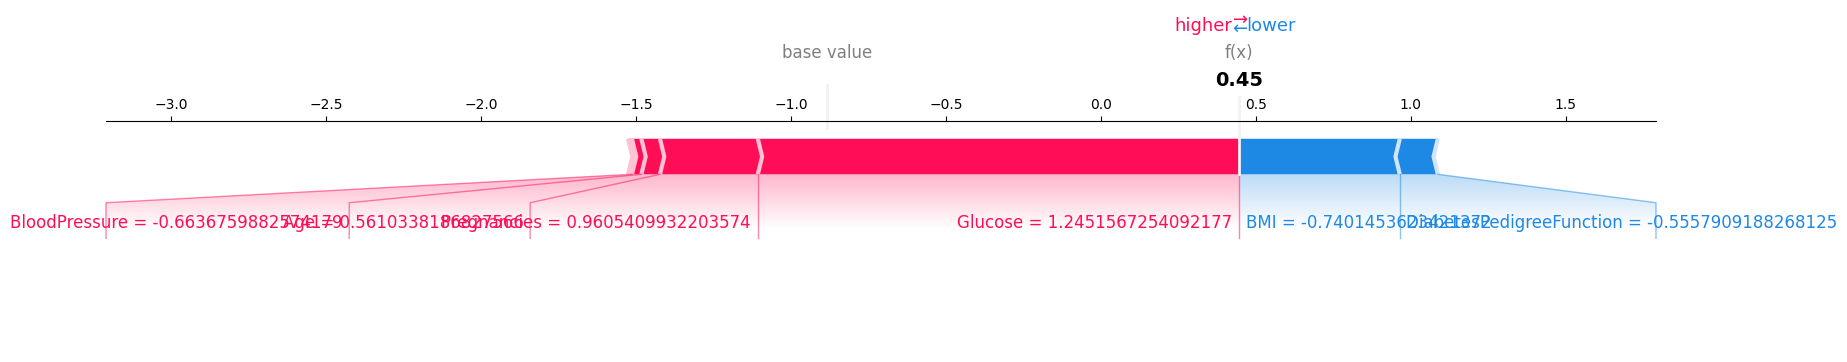

In [21]:
# Pick one test instance
idx = 0  # you can change this
x_example = X_test_sample[idx : idx+1]  # keep as 2D array

shap_value_single = explainer.shap_values(x_example)

shap.force_plot(
    explainer.expected_value,
    shap_value_single,
    X_test_df.iloc[idx],
    matplotlib=True
)


# LIME local explanation

In [22]:
# Step 6: Explainability - LIME (Local)

# Create LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns,
    class_names=['No Diabetes', 'Diabetes'],
    discretize_continuous=True,
    mode='classification'
)

# Explain one prediction
i = 0  # index of instance to explain
x_instance = X_test_scaled[i]

lime_exp = lime_explainer.explain_instance(
    data_row=x_instance,
    predict_fn=best_model.predict_proba,
    num_features=8
)

lime_exp.show_in_notebook(show_table=True)


# Simple “deployment” in Colab (interactive-like function)

We’ll build a function where the user can input values, and the model will return a prediction.

In [23]:
# Step 7: Simple deployment function in Colab

def predict_diabetes(
    pregnancies,
    glucose,
    blood_pressure,
    skin_thickness,
    insulin,
    bmi,
    dpf,    # DiabetesPedigreeFunction
    age
):
    # Build a single-row DataFrame
    input_dict = {
        'Pregnancies': [pregnancies],
        'Glucose': [glucose],
        'BloodPressure': [blood_pressure],
        'SkinThickness': [skin_thickness],
        'Insulin': [insulin],
        'BMI': [bmi],
        'DiabetesPedigreeFunction': [dpf],
        'Age': [age]
    }
    input_df = pd.DataFrame(input_dict)

    # Apply same scaling as training data
    input_scaled = scaler.transform(input_df)

    # Get prediction and probability
    pred = best_model.predict(input_scaled)[0]
    proba = best_model.predict_proba(input_scaled)[0, 1]

    label = "Diabetes" if pred == 1 else "No Diabetes"
    print(f"Prediction: {label}")
    print(f"Probability of Diabetes: {proba:.2f}")

    return pred, proba

# Example call:
predict_diabetes(
    pregnancies=2,
    glucose=120,
    blood_pressure=70,
    skin_thickness=25,
    insulin=100,
    bmi=30.0,
    dpf=0.5,
    age=35
)


Prediction: No Diabetes
Probability of Diabetes: 0.21


(np.int64(0), np.float64(0.20921327763688752))